In [316]:
# Loading the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [251]:
# Loading the dataset

data = pd.read_csv("C:\\Users\\Amit\\Dropbox\\Prescriptive Analytics\\Kavita\\Data2.csv")

In [252]:
# Renaming the columns for better understanding

data.columns=['Gender','Income_type','Edu_Type','Family_Status','Age','Employment_Dur','Registered_Dur','Id_Pub_Dur',
              'Emp_Phn','Work_Phn','Phn','Occupation','Not_Live_City','Not_Work_City','Org_Type','Phn_Change_Since','Target']

In [150]:
# Confirming that data is loaded successfully

data.head(2)

,Gender,Income_type,Edu_Type,Family_Status,Age,Employment_Dur,Registered_Dur,Id_Pub_Dur,Emp_Phn,Work_Phn,Phn,Occupation,Not_Live_City,Not_Work_City,Org_Type,Phn_Change_Since,Target
0,M,Working,Secondary / secondary special,Single / not married,9461,637,3648.0,2120,1,0,1,Laborers,0,0,Business Entity Type 3,1134,1
1,F,State servant,Higher education,Married,16765,1188,1186.0,291,1,0,1,Core staff,0,0,School,828,0


In [151]:
# Seeing the look and shape of data

print(data.shape)

print(list(data.columns))

(278232, 17)
['Gender', 'Income_type', 'Edu_Type', 'Family_Status', 'Age', 'Employment_Dur', 'Registered_Dur', 'Id_Pub_Dur', 'Emp_Phn', 'Work_Phn', 'Phn', 'Occupation', 'Not_Live_City', 'Not_Work_City', 'Org_Type', 'Phn_Change_Since', 'Target']


In [152]:
# Checking the data types of each columns.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278232 entries, 0 to 278231
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Gender            278232 non-null  object 
 1   Income_type       278232 non-null  object 
 2   Edu_Type          278232 non-null  object 
 3   Family_Status     278232 non-null  object 
 4   Age               278232 non-null  int64  
 5   Employment_Dur    278232 non-null  int64  
 6   Registered_Dur    278232 non-null  float64
 7   Id_Pub_Dur        278232 non-null  int64  
 8   Emp_Phn           278232 non-null  int64  
 9   Work_Phn          278232 non-null  int64  
 10  Phn               278232 non-null  int64  
 11  Occupation        189432 non-null  object 
 12  Not_Live_City     278232 non-null  int64  
 13  Not_Work_City     278232 non-null  int64  
 14  Org_Type          278232 non-null  object 
 15  Phn_Change_Since  278232 non-null  int64  
 16  Target            27

In [153]:
# Checking percentage of Missing values in the dataset
# From the data it is clear that nearly 32% of data in the feature "Occupation" is missing. 

data.isnull().mean().sort_values(ascending = False)*100

Occupation          31.915811
Target               0.000000
Id_Pub_Dur           0.000000
Income_type          0.000000
Edu_Type             0.000000
Family_Status        0.000000
Age                  0.000000
Employment_Dur       0.000000
Registered_Dur       0.000000
Emp_Phn              0.000000
Phn_Change_Since     0.000000
Work_Phn             0.000000
Phn                  0.000000
Not_Live_City        0.000000
Not_Work_City        0.000000
Org_Type             0.000000
Gender               0.000000
dtype: float64

In [253]:
# Since the percentage of missing values is nearly 1/3 of whole dataset, it is not wise to drop this much amount of data.
# Strategy of Imputing with 'constant value' is been followed , though there exists many more.

imp = SimpleImputer(strategy='constant', fill_value='Missing')
data_without_missing = pd.DataFrame(imp.fit_transform(data))
data_without_missing.columns=data.columns
data_without_missing.index=data.index

In [254]:
# After imputation the data is clean and has no missing values.

data_without_missing.isnull().mean().sort_values(ascending = False)*100

Target              0.0
Id_Pub_Dur          0.0
Income_type         0.0
Edu_Type            0.0
Family_Status       0.0
Age                 0.0
Employment_Dur      0.0
Registered_Dur      0.0
Emp_Phn             0.0
Phn_Change_Since    0.0
Work_Phn            0.0
Phn                 0.0
Occupation          0.0
Not_Live_City       0.0
Not_Work_City       0.0
Org_Type            0.0
Gender              0.0
dtype: float64

In [255]:
data = data_without_missing

In [256]:
# Getting a glimpse of data like the levels in each categorical feature

data.describe()

,Gender,Income_type,Edu_Type,Family_Status,Age,Employment_Dur,Registered_Dur,Id_Pub_Dur,Emp_Phn,Work_Phn,Phn,Occupation,Not_Live_City,Not_Work_City,Org_Type,Phn_Change_Since,Target
count,278232,278232,278232,278232,278232,278232,278232.0,278232,278232,278232,278232,278232,278232,278232,278232,278232,278232
unique,2,7,5,5,17293,12379,15609.0,6162,2,2,2,19,2,2,58,3758,2
top,F,Working,Secondary / secondary special,Married,13749,365243,1.0,4053,1,0,0,Missing,0,0,Business Entity Type 3,0,0
freq,182800,142719,200125,178711,42,52008,103.0,155,226214,221548,199163,88800,256811,214283,60755,34836,255011


In [257]:
# Converting the below columns in number of years format for better understanding.

data['Age'] = data['Age']/365
data['Employment_Dur'] = data['Employment_Dur']/365
data['Registered_Dur'] = data['Registered_Dur']/365
data['Id_Pub_Dur'] = data['Id_Pub_Dur']/365
data['Phn_Change_Since'] = data['Phn_Change_Since']/365

data.head(2)

,Gender,Income_type,Edu_Type,Family_Status,Age,Employment_Dur,Registered_Dur,Id_Pub_Dur,Emp_Phn,Work_Phn,Phn,Occupation,Not_Live_City,Not_Work_City,Org_Type,Phn_Change_Since,Target
0,M,Working,Secondary / secondary special,Single / not married,25.9205,1.74521,9.99452,5.80822,1,0,1,Laborers,0,0,Business Entity Type 3,3.10685,1
1,F,State servant,Higher education,Married,45.9315,3.25479,3.24932,0.79726,1,0,1,Core staff,0,0,School,2.26849,0


In [258]:
# Checking levels of all categorical features and trying to reduce the levels in each category after data understanding.

data["Income_type"].value_counts()

Working                 142719
Commercial associate     63652
Pensioner                51993
State servant            19836
Unemployed                  15
Student                     15
Maternity leave              2
Name: Income_type, dtype: int64

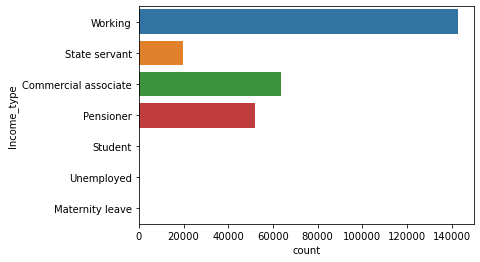

In [259]:
sns.countplot(y="Income_type", data=data)
plt.show()

In [260]:
# For the above column Income_type , I am combining all the levels and splitting them into two levels i.e 'Job' & 'Not In Job'

data['Income_type'] = data['Income_type'].replace(to_replace ="Working",value ="Job")
data['Income_type'] = data['Income_type'].replace(to_replace ="Commercial associate",value ="Job")
data['Income_type'] = data['Income_type'].replace(to_replace ="State servant",value ="Job")
data['Income_type'] = data['Income_type'].replace(to_replace ="Pensioner",value ="Not In Job")
data['Income_type'] = data['Income_type'].replace(to_replace ="Student",value ="Not In Job")
data['Income_type'] = data['Income_type'].replace(to_replace ="Unemployed",value ="Not In Job")
data['Income_type'] = data['Income_type'].replace(to_replace ="Maternity leave",value ="Not In Job")

data["Income_type"].value_counts()

Job           226207
Not In Job     52025
Name: Income_type, dtype: int64

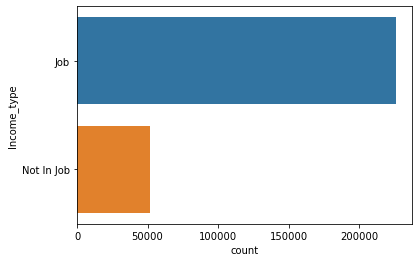

In [261]:
sns.countplot(y="Income_type", data=data)
plt.show()

In [262]:
# Doing Ordinal encoding of 'Income_type' column

data['Income_type'] = data['Income_type'].replace(to_replace ="Not In Job",value =0)
data['Income_type'] = data['Income_type'].replace(to_replace ="Job",value =1)

data["Income_type"].value_counts()

1    226207
0     52025
Name: Income_type, dtype: int64

In [263]:
data["Edu_Type"].value_counts()

Secondary / secondary special    200125
Higher education                  65321
Incomplete higher                  9032
Lower secondary                    3608
Academic degree                     146
Name: Edu_Type, dtype: int64

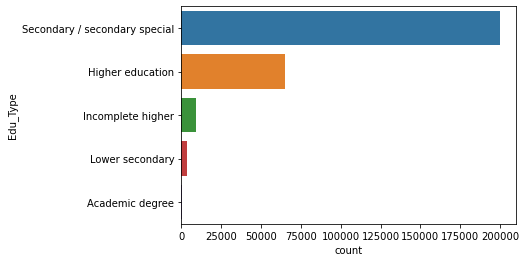

In [264]:
sns.countplot(y="Edu_Type", data=data)
plt.show()

In [265]:
# For the above column Edu_type , I am combining all the levels and splitting them into three levels i.e 'HSC','SSC','Degree'

data['Edu_Type'] = data['Edu_Type'].replace(to_replace ="Secondary / secondary special",value ="SSC")
data['Edu_Type'] = data['Edu_Type'].replace(to_replace ="Higher education",value ="HSC")
data['Edu_Type'] = data['Edu_Type'].replace(to_replace ="Incomplete higher",value ="SSC")
data['Edu_Type'] = data['Edu_Type'].replace(to_replace ="Lower secondary",value ="SSC")
data['Edu_Type'] = data['Edu_Type'].replace(to_replace ="Academic degree",value ="Degree")

data["Edu_Type"].value_counts()

SSC       212765
HSC        65321
Degree       146
Name: Edu_Type, dtype: int64

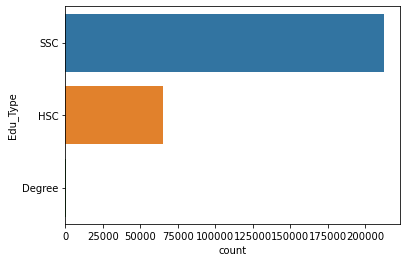

In [266]:
sns.countplot(y="Edu_Type", data=data)
plt.show()

In [267]:
# Doing Ordinal encoding of 'Edu_Type' column

data['Edu_Type'] = data['Edu_Type'].replace(to_replace ="HSC",value =0)
data['Edu_Type'] = data['Edu_Type'].replace(to_replace ="SSC",value =1)
data['Edu_Type'] = data['Edu_Type'].replace(to_replace ="Degree",value =2)

data["Edu_Type"].value_counts()


1    212765
0     65321
2       146
Name: Edu_Type, dtype: int64

In [268]:
data["Occupation"].value_counts()

Missing                  88800
Laborers                 50131
Sales staff              28534
Core staff               24374
Managers                 18739
Drivers                  17248
High skill tech staff    10008
Accountants               8607
Medicine staff            7740
Security staff            6178
Cooking staff             5437
Cleaning staff            4235
Private service staff     2359
Low-skill Laborers        1930
Waiters/barmen staff      1170
Secretaries               1169
Realty agents              675
HR staff                   478
IT staff                   420
Name: Occupation, dtype: int64

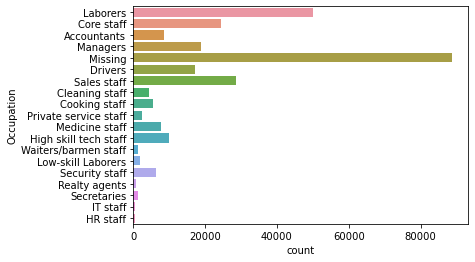

In [269]:
sns.countplot(y="Occupation", data=data)
plt.show()

In [270]:
# For the above column Occupation,I am combining all the levels and splitting them into four levels i.e 'Missing','GradeA','GradeB' & 'GradeC'

data['Occupation'] = data['Occupation'].replace(to_replace ="Laborers",value ="GroupC")
data['Occupation'] = data['Occupation'].replace(to_replace ="Sales staff",value ="GroupB")
data['Occupation'] = data['Occupation'].replace(to_replace ="Core staff",value ="GroupA")
data['Occupation'] = data['Occupation'].replace(to_replace ="Managers",value ="GroupA")
data['Occupation'] = data['Occupation'].replace(to_replace ="Drivers",value ="GroupC")
data['Occupation'] = data['Occupation'].replace(to_replace ="High skill tech staff",value ="GroupA")
data['Occupation'] = data['Occupation'].replace(to_replace ="Accountants",value ="GroupB")
data['Occupation'] = data['Occupation'].replace(to_replace ="Medicine staff",value ="GroupC")
data['Occupation'] = data['Occupation'].replace(to_replace ="Security staff",value ="GroupC")
data['Occupation'] = data['Occupation'].replace(to_replace ="Cooking staff",value ="GroupC")
data['Occupation'] = data['Occupation'].replace(to_replace ="Cleaning staff",value ="GroupC")
data['Occupation'] = data['Occupation'].replace(to_replace ="Private service staff",value ="GroupC")
data['Occupation'] = data['Occupation'].replace(to_replace ="Low-skill Laborers",value ="GroupC")
data['Occupation'] = data['Occupation'].replace(to_replace ="Waiters/barmen staff",value ="GroupC")
data['Occupation'] = data['Occupation'].replace(to_replace ="Secretaries",value ="GroupB")
data['Occupation'] = data['Occupation'].replace(to_replace ="Realty agents",value ="GroupC")
data['Occupation'] = data['Occupation'].replace(to_replace ="HR staff",value ="GroupB")
data['Occupation'] = data['Occupation'].replace(to_replace ="IT staff",value ="GroupB")

data["Occupation"].value_counts()

GroupC     97103
Missing    88800
GroupA     53121
GroupB     39208
Name: Occupation, dtype: int64

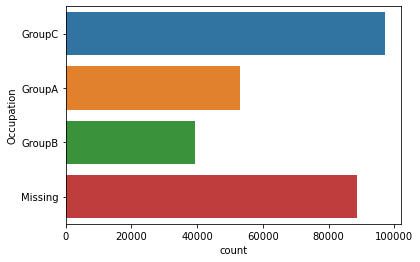

In [271]:
sns.countplot(y="Occupation", data=data)
plt.show()

In [272]:
# Doing Ordinal encoding of 'Occupation' column

data['Occupation'] = data['Occupation'].replace(to_replace ="Missing",value =0)
data['Occupation'] = data['Occupation'].replace(to_replace ="GroupC",value =1)
data['Occupation'] = data['Occupation'].replace(to_replace ="GroupB",value =2)
data['Occupation'] = data['Occupation'].replace(to_replace ="GroupA",value =3)

data["Occupation"].value_counts()

1    97103
0    88800
3    53121
2    39208
Name: Occupation, dtype: int64

In [273]:
data["Gender"].value_counts()

F    182800
M     95432
Name: Gender, dtype: int64

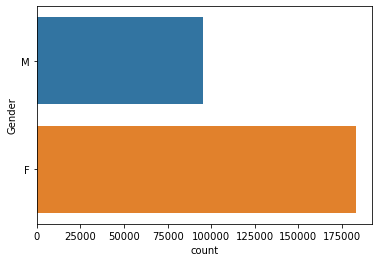

In [274]:
sns.countplot(y="Gender", data=data)
plt.show()

In [275]:
data["Family_Status"].value_counts()

Married                 178711
Single / not married     39709
Civil marriage           26981
Separated                17846
Widow                    14985
Name: Family_Status, dtype: int64

In [276]:
# For the above column Family_Status,I am combining all the levels and splitting them into three levels i.e 'Married','Single','Others'

data['Family_Status'] = data['Family_Status'].replace(to_replace ="Single / not married",value ="Single")
data['Family_Status'] = data['Family_Status'].replace(to_replace ="Civil marriage",value ="Married")
data['Family_Status'] = data['Family_Status'].replace(to_replace ="Separated",value ="Others")
data['Family_Status'] = data['Family_Status'].replace(to_replace ="Widow",value ="Others")

data["Family_Status"].value_counts()

Married    205692
Single      39709
Others      32831
Name: Family_Status, dtype: int64

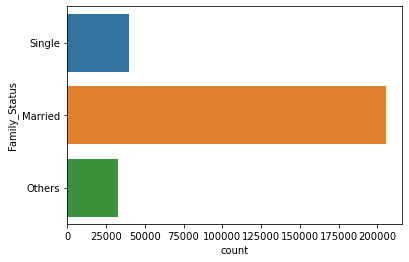

In [277]:
sns.countplot(y="Family_Status", data=data)
plt.show()

In [278]:
data["Org_Type"].value_counts()

Business Entity Type 3    60755
XNA                       52008
Self-employed             34518
Other                     15014
Medicine                  10118
Government                 9469
Business Entity Type 2     9363
School                     8067
Trade: type 7              7058
Kindergarten               6273
Construction               6084
Business Entity Type 1     5245
Transport: type 4          4925
Trade: type 3              3052
Industry: type 9           3022
Industry: type 3           2986
Security                   2955
Housing                    2715
Industry: type 11          2433
Military                   2379
Agriculture                2293
Bank                       2111
Police                     2086
Transport: type 2          2002
Postal                     1985
Security Ministries        1763
Restaurant                 1610
Trade: type 2              1599
Services                   1400
University                 1174
Industry: type 7           1164
Transpor

In [279]:
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Business Entity Type 3",value ="Business")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Business Entity Type 2",value ="Business")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Business Entity Type 1",value ="Business")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Trade: type 7",value ="Trade")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Trade: type 3",value ="Trade")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Trade: type 2",value ="Trade")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Trade: type 1",value ="Trade")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Trade: type 6",value ="Trade")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Trade: type 4",value ="Trade")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Trade: type 5",value ="Trade")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Industry: type 10",value ="Industry")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Industry: type 13",value ="Industry")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Industry: type 6",value ="Industry")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Industry: type 8",value ="Industry")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Industry: type 12",value ="Industry")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Industry: type 2",value ="Industry")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Industry: type 5",value ="Industry")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Industry: type 4",value ="Industry")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Industry: type 1",value ="Industry")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Industry: type 7",value ="Industry")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Industry: type 9",value ="Industry")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Industry: type 3",value ="Industry")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Industry: type 11",value ="Industry")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Transport: type 4",value ="Transport")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Transport: type 3",value ="Transport")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Transport: type 2",value ="Transport")
data['Org_Type'] = data['Org_Type'].replace(to_replace ="Transport: type 1",value ="Transport")

data["Org_Type"].value_counts()

Business               75363
XNA                    52008
Self-employed          34518
Other                  15014
Industry               12864
Trade                  12660
Medicine               10118
Government              9469
Transport               8187
School                  8067
Kindergarten            6273
Construction            6084
Security                2955
Housing                 2715
Military                2379
Agriculture             2293
Bank                    2111
Police                  2086
Postal                  1985
Security Ministries     1763
Restaurant              1610
Services                1400
University              1174
Hotel                    879
Electricity              843
Telecom                  523
Insurance                513
Emergency                505
Advertising              368
Realtor                  333
Culture                  330
Mobile                   268
Legal Services           259
Cleaning                 236
Religion      

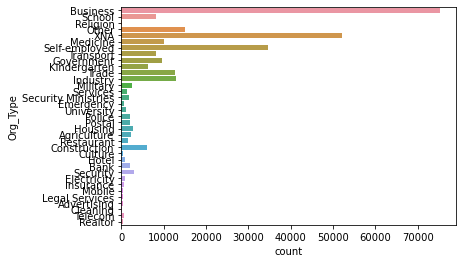

In [280]:
sns.countplot(y="Org_Type", data=data)
plt.show()

In [281]:
# Class-Imbalance is clearly seen here

data["Target"].value_counts()

0    255011
1     23221
Name: Target, dtype: int64

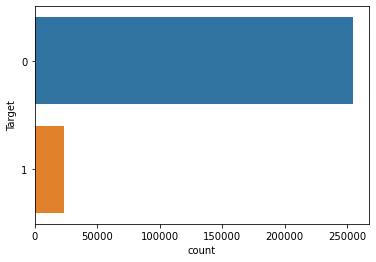

In [282]:
sns.countplot(y="Target", data=data)
plt.show()

In [284]:
# Creating dummies(One hot encoding) for all the "nominal categorical variables".

data_dummies = pd.get_dummies(data, columns =['Gender', 'Family_Status', 'Emp_Phn',
                                       'Work_Phn', 'Phn', 'Not_Live_City','Not_Work_City','Org_Type'],drop_first=True)

In [285]:
data_dummies.columns

Index(['Income_type', 'Edu_Type', 'Age', 'Employment_Dur', 'Registered_Dur',
       'Id_Pub_Dur', 'Occupation', 'Phn_Change_Since', 'Target', 'Gender_M',
       'Family_Status_Others', 'Family_Status_Single', 'Emp_Phn_1',
       'Work_Phn_1', 'Phn_1', 'Not_Live_City_1', 'Not_Work_City_1',
       'Org_Type_Agriculture', 'Org_Type_Bank', 'Org_Type_Business',
       'Org_Type_Cleaning', 'Org_Type_Construction', 'Org_Type_Culture',
       'Org_Type_Electricity', 'Org_Type_Emergency', 'Org_Type_Government',
       'Org_Type_Hotel', 'Org_Type_Housing', 'Org_Type_Industry',
       'Org_Type_Insurance', 'Org_Type_Kindergarten',
       'Org_Type_Legal Services', 'Org_Type_Medicine', 'Org_Type_Military',
       'Org_Type_Mobile', 'Org_Type_Other', 'Org_Type_Police',
       'Org_Type_Postal', 'Org_Type_Realtor', 'Org_Type_Religion',
       'Org_Type_Restaurant', 'Org_Type_School', 'Org_Type_Security',
       'Org_Type_Security Ministries', 'Org_Type_Self-employed',
       'Org_Type_Services', 'Or

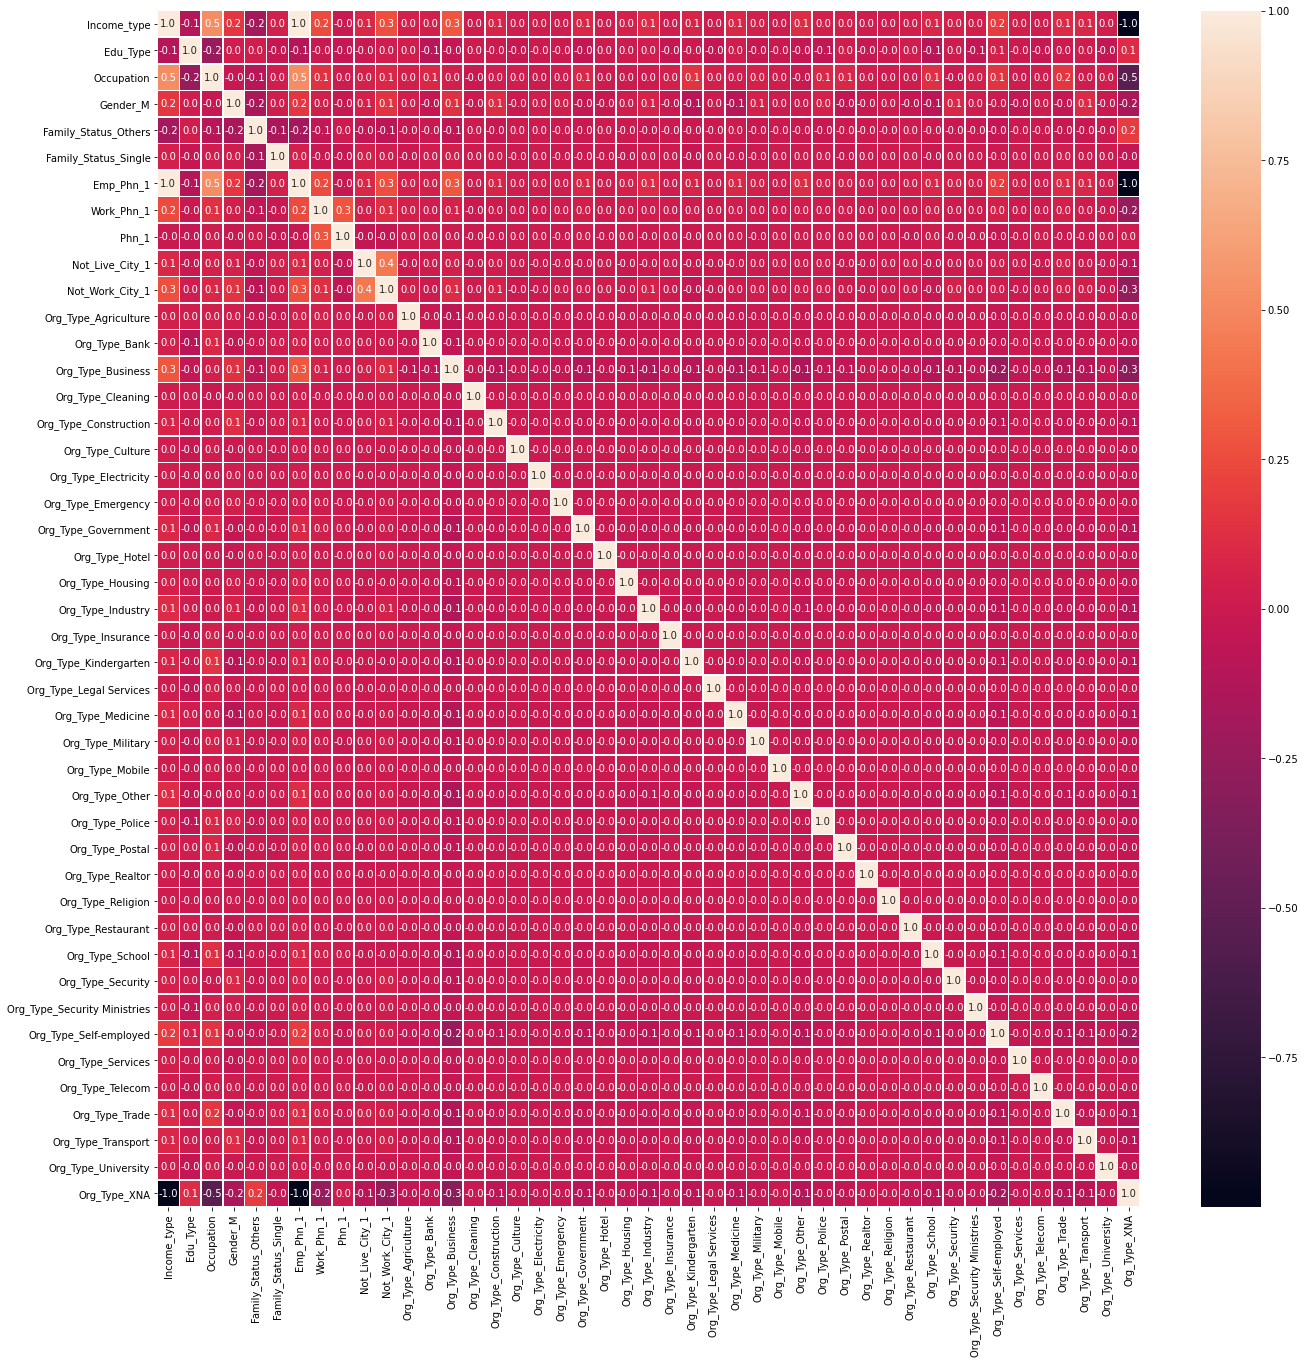

In [286]:
# Heat map

f,ax = plt.subplots(figsize=(22, 22))
sns.heatmap(data_dummies.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [287]:
# Changing the datatype of continuous features to float.

data_dummies['Age'] = data_dummies['Age'].astype(float)
data_dummies['Employment_Dur'] = data_dummies['Employment_Dur'].astype(float)
data_dummies['Registered_Dur'] = data_dummies['Registered_Dur'].astype(float)
data_dummies['Id_Pub_Dur'] = data_dummies['Id_Pub_Dur'].astype(float)
data_dummies['Phn_Change_Since'] = data_dummies['Phn_Change_Since'].astype(float)
data_dummies['Id_Pub_Dur'] = data_dummies['Id_Pub_Dur'].astype(float)

In [288]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278232 entries, 0 to 278231
Data columns (total 51 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Income_type                   278232 non-null  int64  
 1   Edu_Type                      278232 non-null  int64  
 2   Age                           278232 non-null  float64
 3   Employment_Dur                278232 non-null  float64
 4   Registered_Dur                278232 non-null  float64
 5   Id_Pub_Dur                    278232 non-null  float64
 6   Occupation                    278232 non-null  int64  
 7   Phn_Change_Since              278232 non-null  float64
 8   Target                        278232 non-null  object 
 9   Gender_M                      278232 non-null  uint8  
 10  Family_Status_Others          278232 non-null  uint8  
 11  Family_Status_Single          278232 non-null  uint8  
 12  Emp_Phn_1                     278232 non-nul

In [289]:
data = data_dummies

In [290]:
# Seperating the independent and dependent variables
X = data.drop(columns=['Target'],axis=1)
y = data['Target']

In [291]:
# To fix the CLass Imbalance problem, "Sampling with replacement" technique is used

# separate minority and majority classes
not_risky = data[data.Target==0]
risky = data[data.Target==1]

# upsample minority i.e risky
risky_upsampled = resample(risky,
                          replace=True, # sample with replacement
                          n_samples=len(not_risky), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_risky, risky_upsampled])

In [292]:
upsampled["Target"].value_counts()

1    255011
0    255011
Name: Target, dtype: int64

In [293]:
data_X = upsampled.drop(columns=['Target'],axis=1)
data_y = upsampled['Target']

In [296]:
# Applying SelectKBest class to extract top 30 best features
bestfeatures = SelectKBest(score_func=f_classif, k=30)
fit = bestfeatures.fit(data_X,data_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))

                           Specs         Score
2                            Age  11974.495803
7               Phn_Change_Since   5790.284564
1                       Edu_Type   5564.501280
8                       Gender_M   5405.310644
3                 Employment_Dur   4976.218544
49                  Org_Type_XNA   4775.078949
11                     Emp_Phn_1   4774.202243
0                    Income_type   4768.923344
5                     Id_Pub_Dur   4396.254834
15               Not_Work_City_1   4220.527257
4                 Registered_Dur   3352.178586
14               Not_Live_City_1   2820.359809
43        Org_Type_Self-employed   1248.173224
13                         Phn_1   1217.021038
18             Org_Type_Business   1210.680850
10          Family_Status_Single   1143.282087
12                    Work_Phn_1   1008.015206
20         Org_Type_Construction    516.963900
40               Org_Type_School    370.726006
9           Family_Status_Others    285.080767
31           

In [297]:
data_X.describe()

,Income_type,Edu_Type,Age,Employment_Dur,Registered_Dur,Id_Pub_Dur,Occupation,Phn_Change_Since,Gender_M,Family_Status_Others,...,Org_Type_School,Org_Type_Security,Org_Type_Security Ministries,Org_Type_Self-employed,Org_Type_Services,Org_Type_Telecom,Org_Type_Trade,Org_Type_Transport,Org_Type_University,Org_Type_XNA
count,510022.000000,510022.000000,510022.000000,510022.000000,510022.000000,510022.000000,510022.000000,510022.000000,510022.000000,510022.000000,...,510022.000000,510022.000000,510022.000000,510022.000000,510022.000000,510022.000000,510022.000000,510022.00000,510022.000000,510022.000000
mean,0.842256,0.800499,42.781279,162.717457,13.089846,7.955799,1.198825,2.488556,0.384462,0.111821,...,0.025456,0.011784,0.005225,0.138208,0.004657,0.001792,0.048347,0.03194,0.003565,0.157670
std,0.364501,0.400454,11.796156,362.576063,9.435044,4.138766,1.041594,2.211676,0.486468,0.315146,...,0.157505,0.107912,0.072097,0.345118,0.068081,0.042295,0.214498,0.17584,0.059597,0.364431
min,0.000000,0.000000,20.517808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,32.849315,2.230137,5.115068,4.394521,0.000000,0.665753,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,41.506849,5.038356,11.789041,8.452055,1.000000,1.915068,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,1.000000,52.419178,12.610959,19.531507,11.597260,2.000000,4.120548,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,2.000000,69.043836,1000.665753,67.594521,19.717808,3.000000,11.758904,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [299]:
# Scaling the continuous features.

scaled_features = data_X.copy()
col_names = ['Age','Employment_Dur', 'Registered_Dur','Id_Pub_Dur','Phn_Change_Since']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features

data_X = scaled_features

In [306]:
# Split the dataset into train and test sets
# Train 70% and Test 30%
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.30, random_state=1)

In [310]:
X_train

,Income_type,Edu_Type,Age,Employment_Dur,Registered_Dur,Id_Pub_Dur,Occupation,Phn_Change_Since,Gender_M,Family_Status_Others,...,Org_Type_School,Org_Type_Security,Org_Type_Security Ministries,Org_Type_Self-employed,Org_Type_Services,Org_Type_Telecom,Org_Type_Trade,Org_Type_Transport,Org_Type_University,Org_Type_XNA
267253,1,1,-1.201499,-0.442601,-0.230500,0.134468,1,0.102417,1,0,...,0,0,0,1,0,0,0,0,0,0
226633,0,1,1.870319,2.311099,-0.974158,0.756055,0,0.937339,0,1,...,0,0,0,0,0,0,0,0,0,1
36970,1,1,-1.188493,-0.442586,-1.103957,-0.338177,0,-0.694104,0,0,...,0,0,0,0,0,0,0,0,0,0
130384,1,1,1.358427,-0.441309,-0.607701,1.017532,1,-1.064492,1,0,...,0,0,0,0,0,0,0,0,0,0
222417,0,0,1.575819,2.311099,0.864805,0.777238,0,-0.734983,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174608,0,1,1.524258,2.311099,0.561360,0.769957,0,-1.125191,0,0,...,0,0,0,0,0,0,0,0,0,1
121517,1,0,-1.082352,-0.433745,-1.192232,-0.745287,3,-0.334864,0,0,...,0,0,0,0,0,0,0,0,0,0
192183,1,0,-1.528980,-0.446258,-0.769732,-0.795597,2,-0.015265,0,0,...,0,0,0,0,0,0,0,0,0,0
174744,1,1,0.061741,-0.427163,0.869742,0.677943,1,-0.939378,0,0,...,0,0,0,0,0,0,0,0,0,0


In [315]:
#Logistic Regression
y_train=y_train.astype('int')
y_test=y_test.astype('int')
model = LogisticRegression()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Set Accuracy:60.98259176785289
Test Set Accuracy:60.90767089087428

Confusion Matrix:
[[46140 29424]
 [30390 47053]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.61      0.61     75564
           1       0.62      0.61      0.61     77443

    accuracy                           0.61    153007
   macro avg       0.61      0.61      0.61    153007
weighted avg       0.61      0.61      0.61    153007



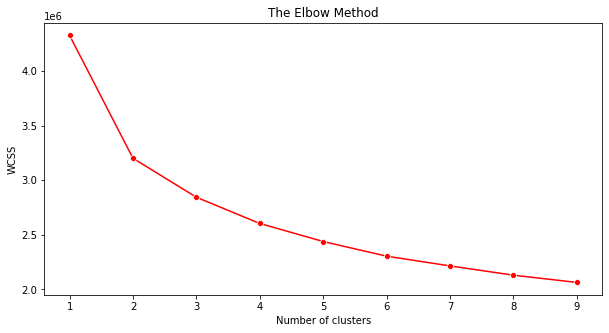

In [318]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

## Plotting the elbow method to get number of clusters

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 10), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [319]:
## Fitting K-Means to the dataset with 4 number of clusters
kmeans = KMeans(n_clusters = 4 , random_state = 42)
identified_clusters = kmeans.fit_predict(data_X)

In [320]:
data_with_clusters = data_X.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Income_type,Edu_Type,Age,Employment_Dur,Registered_Dur,Id_Pub_Dur,Occupation,Phn_Change_Since,Gender_M,Family_Status_Others,...,Org_Type_Security,Org_Type_Security Ministries,Org_Type_Self-employed,Org_Type_Services,Org_Type_Telecom,Org_Type_Trade,Org_Type_Transport,Org_Type_University,Org_Type_XNA,Cluster
1,1,0,0.267056,-0.439805,-1.042978,-1.729633,3,-0.099500,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0.787309,-0.425818,1.467920,-0.309051,1,-0.360878,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,1,1.002611,-0.425826,-0.135547,0.366818,3,0.244874,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0.307933,-0.436783,0.055812,-1.606507,1,2.016297,1,0,...,0,0,0,0,0,0,0,0,0,3
5,1,0,-0.426693,-0.425131,-1.035137,-1.512508,2,0.809747,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123249,1,1,-0.791335,-0.446251,-0.228468,-1.554873,1,-0.628450,1,0,...,0,0,1,0,0,0,0,0,0,2
165888,1,1,0.129792,-0.447996,-1.035718,0.776576,1,-0.757280,1,0,...,0,0,0,0,0,1,0,0,0,2
80900,1,1,-1.035901,-0.440599,-1.375751,-1.848125,1,0.688349,1,0,...,0,0,0,0,0,0,0,0,0,2
196535,1,1,-0.634562,-0.416675,-0.243277,-0.656584,3,-0.402996,0,0,...,0,0,0,0,0,0,0,0,0,0


In [321]:
# Writing the final data into csv file

data_with_clusters.to_csv("C:\\Users\\Amit\\Dropbox\\Prescriptive Analytics\\Kavita\\Data2_With_Cluster.csv")

In [322]:
# Analyzing each clusters 

cluster1=data_with_clusters.loc[data_with_clusters['Cluster'] == 0]
cluster2=data_with_clusters.loc[data_with_clusters['Cluster'] == 1]
cluster3=data_with_clusters.loc[data_with_clusters['Cluster'] == 2]
cluster4=data_with_clusters.loc[data_with_clusters['Cluster'] == 3]

In [323]:
cluster1.describe()

,Income_type,Edu_Type,Age,Employment_Dur,Registered_Dur,Id_Pub_Dur,Occupation,Phn_Change_Since,Gender_M,Family_Status_Others,...,Org_Type_Security,Org_Type_Security Ministries,Org_Type_Self-employed,Org_Type_Services,Org_Type_Telecom,Org_Type_Trade,Org_Type_Transport,Org_Type_University,Org_Type_XNA,Cluster
count,127235.000000,127235.000000,127235.000000,127235.000000,127235.000000,127235.000000,127235.000000,127235.000000,127235.000000,127235.000000,...,127235.000000,127235.000000,127235.000000,127235.000000,127235.000000,127235.000000,127235.000000,127235.000000,127235.0,127235.0
mean,0.999992,0.648925,-0.454478,-0.433695,-0.270601,-0.279192,2.578072,-0.304579,0.244563,0.080017,...,0.004291,0.008999,0.218305,0.003568,0.002939,0.118230,0.021087,0.004354,0.0,0.0
std,0.002803,0.478574,0.789889,0.015061,0.847921,0.980884,0.493869,0.718954,0.429830,0.271321,...,0.065367,0.094436,0.413097,0.059628,0.054137,0.322882,0.143675,0.065842,0.0,0.0
min,0.000000,0.000000,-1.843920,-0.448782,-1.387366,-1.922265,2.000000,-1.125191,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1.000000,0.000000,-1.104881,-0.443750,-1.006390,-1.130552,2.000000,-0.903454,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,1.000000,1.000000,-0.568834,-0.438392,-0.406469,-0.323614,3.000000,-0.451307,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,1.000000,1.000000,0.149650,-0.428969,0.252108,0.613732,3.000000,0.144535,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,2.000000,2.183633,-0.313434,4.007566,2.230919,3.000000,2.895814,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


In [324]:
cluster2.describe()

,Income_type,Edu_Type,Age,Employment_Dur,Registered_Dur,Id_Pub_Dur,Occupation,Phn_Change_Since,Gender_M,Family_Status_Others,...,Org_Type_Security,Org_Type_Security Ministries,Org_Type_Self-employed,Org_Type_Services,Org_Type_Telecom,Org_Type_Trade,Org_Type_Transport,Org_Type_University,Org_Type_XNA,Cluster
count,80338.000000,80338.000000,80338.000000,80338.000000,80338.000000,80338.000000,80338.0,80338.000000,80338.000000,80338.000000,...,80338.0,80338.0,80338.0,80338.0,80338.0,80338.0,80338.0,80338.0,80338.000000,80338.0
mean,0.000062,0.869501,1.417892,2.310932,0.484895,0.600519,0.0,-0.028078,0.203988,0.244231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999938,1.0
std,0.007889,0.337813,0.490092,0.021177,1.216574,0.775126,0.0,1.011321,0.402963,0.429633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007889,0.0
min,0.000000,0.000000,-1.742656,-0.431637,-1.387366,-1.922265,0.0,-1.125191,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
25%,0.000000,1.000000,1.199564,2.311099,-0.570242,0.388001,0.0,-0.917080,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0
50%,0.000000,1.000000,1.487561,2.311099,0.382488,0.834167,0.0,-0.287792,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0
75%,0.000000,1.000000,1.748153,2.311099,1.474309,1.092335,0.0,0.735422,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0
max,1.000000,2.000000,2.226368,2.311099,5.776838,2.272623,0.0,3.926460,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0


In [325]:
cluster3.describe()

,Income_type,Edu_Type,Age,Employment_Dur,Registered_Dur,Id_Pub_Dur,Occupation,Phn_Change_Since,Gender_M,Family_Status_Others,...,Org_Type_Security,Org_Type_Security Ministries,Org_Type_Self-employed,Org_Type_Services,Org_Type_Telecom,Org_Type_Trade,Org_Type_Transport,Org_Type_University,Org_Type_XNA,Cluster
count,186919.000000,186919.000000,186919.000000,186919.000000,186919.000000,186919.000000,186919.000000,186919.000000,186919.000000,186919.000000,...,186919.000000,186919.000000,186919.000000,186919.000000,186919.000000,186919.000000,186919.000000,186919.000000,186919.000000,186919.0
mean,0.999449,0.862919,-0.389527,-0.433912,-0.225018,-0.266611,0.733323,-0.531934,0.548853,0.075760,...,0.019891,0.004842,0.133684,0.006719,0.001546,0.024075,0.046876,0.003504,0.000439,2.0
std,0.023468,0.344384,0.811844,0.059197,0.855470,0.977098,0.442465,0.552044,0.497609,0.264615,...,0.139626,0.069414,0.340313,0.081697,0.039290,0.153281,0.211374,0.059093,0.020940,0.0
min,0.000000,0.000000,-1.887352,-0.448782,-1.387366,-1.922265,0.000000,-1.125191,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,1.000000,1.000000,-1.070507,-0.444218,-0.974739,-1.114665,0.000000,-1.107849,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,1.000000,1.000000,-0.484060,-0.439586,-0.330681,-0.305741,1.000000,-0.613585,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
75%,1.000000,1.000000,0.248707,-0.430995,0.322960,0.657422,1.000000,-0.204795,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
max,1.000000,2.000000,2.207787,2.311099,3.948619,2.303073,2.000000,1.995238,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


In [326]:
cluster4.describe()

,Income_type,Edu_Type,Age,Employment_Dur,Registered_Dur,Id_Pub_Dur,Occupation,Phn_Change_Since,Gender_M,Family_Status_Others,...,Org_Type_Security,Org_Type_Security Ministries,Org_Type_Self-employed,Org_Type_Services,Org_Type_Telecom,Org_Type_Trade,Org_Type_Transport,Org_Type_University,Org_Type_XNA,Cluster
count,115530.000000,115530.000000,115530.000000,115530.000000,115530.000000,115530.000000,115530.000000,115530.000000,115530.000000,115530.000000,...,115530.000000,115530.000000,115530.000000,115530.000000,115530.000000,115530.000000,115530.000000,115530.000000,115530.0,115530.0
mean,0.999862,0.818454,0.144767,-0.427318,0.324890,0.321243,1.266632,1.215593,0.398061,0.113113,...,0.015113,0.005323,0.153423,0.005756,0.002173,0.044274,0.041937,0.005271,0.0,3.0
std,0.011768,0.386301,0.776003,0.019490,0.988926,0.915289,0.868620,0.776477,0.489500,0.316733,...,0.122003,0.072767,0.360397,0.075650,0.046561,0.205705,0.200446,0.072413,0.0,0.0
min,0.000000,0.000000,-1.684824,-0.448774,-1.387366,-1.922265,0.000000,-1.125191,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.0
25%,1.000000,1.000000,-0.442254,-0.441422,-0.449445,-0.273966,1.000000,0.744093,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.0
50%,1.000000,1.000000,0.051987,-0.432385,0.284775,0.627634,1.000000,1.147928,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.0
75%,1.000000,1.000000,0.781967,-0.420038,1.030539,1.017532,2.000000,1.736338,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.0
max,1.000000,2.000000,2.226136,-0.315920,5.270419,2.841915,3.000000,4.191554,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,3.0
